In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time
random.seed(100)

## **Data Reading**

In [2]:
dataset = pd.read_csv('financial_data.csv')
dataset

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


# **Exploratory Data Analysis**

In [3]:
dataset.head()
dataset.columns
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


# **Data Preprocessing**

In [4]:
dataset.isna().any()

,0
entry_id,False
age,False
pay_schedule,False
home_owner,False
income,False
months_employed,False
years_employed,False
current_address_year,False
personal_account_m,False
personal_account_y,False


In [5]:
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

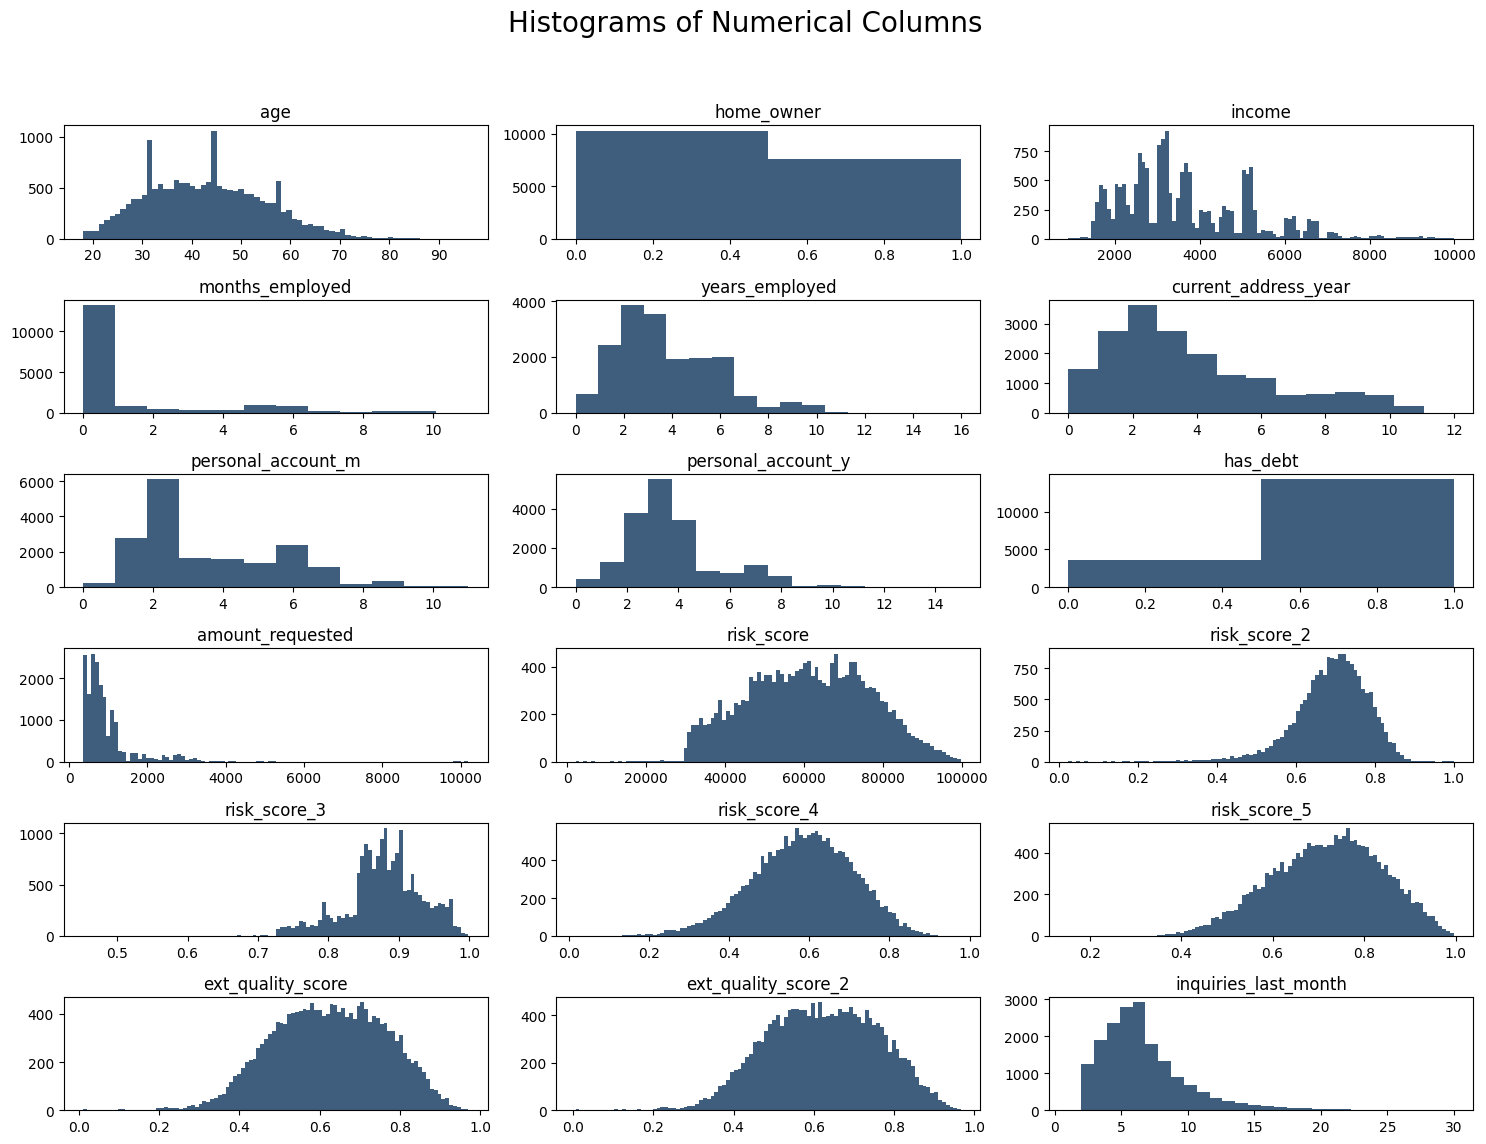

In [6]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# **Finding the correlation with the response variables**

<Axes: title={'center': 'Correlation with E Signed'}>

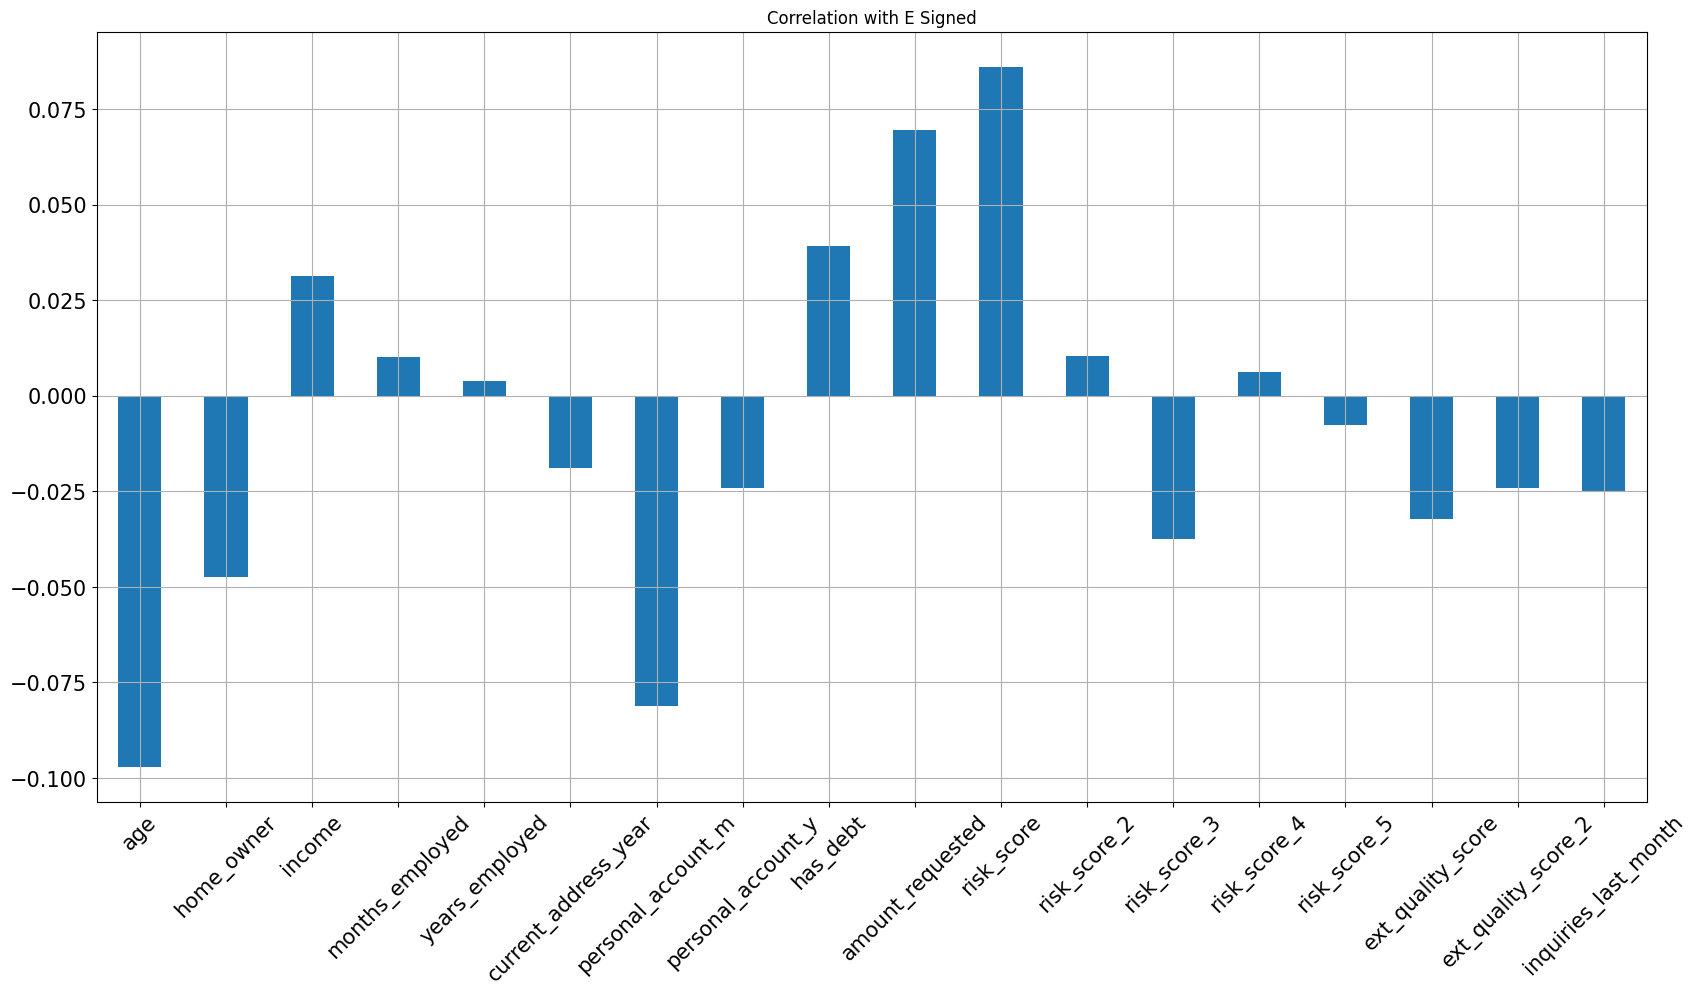

In [7]:
dataset2.corrwith(dataset.e_signed).plot.bar(
        figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

# **Correlation Matrix**

In [8]:
sn.set(style="white")

In [9]:
corr = dataset2.corr()
corr

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
age,1.000000,0.142046,0.174062,-0.103635,0.182590,0.146554,-0.013609,0.041332,-0.043808,0.084132,0.162868,-0.019163,0.111258,0.069191,0.093710,0.032265,0.040019,0.041224
home_owner,0.142046,1.000000,0.147487,0.018008,0.027367,0.179291,0.013782,-0.047105,-0.076206,0.033996,0.113608,0.000647,0.049708,-0.137293,-0.080470,0.010080,0.005507,0.011215
income,0.174062,0.147487,1.000000,-0.049157,0.102139,0.046982,0.009052,-0.002002,-0.011199,0.289099,0.168375,-0.023627,0.058665,-0.001254,0.025179,-0.008429,-0.003323,0.051622
months_employed,-0.103635,0.018008,-0.049157,1.000000,-0.189805,-0.056609,0.211605,-0.019645,-0.000546,-0.044234,-0.044765,0.028950,-0.024297,-0.014512,-0.019406,-0.009041,-0.004461,-0.026710
years_employed,0.182590,0.027367,0.102139,-0.189805,1.000000,0.343905,-0.052543,0.184879,0.005293,0.084841,0.098960,-0.056574,0.074659,-0.029398,0.000234,0.014162,0.030353,0.011976
current_address_year,0.146554,0.179291,0.046982,-0.056609,0.343905,1.000000,0.082491,0.110258,0.017423,0.067893,0.090535,-0.060412,0.058936,-0.161052,-0.094545,0.003362,0.009093,0.013659
personal_account_m,-0.013609,0.013782,0.009052,0.211605,-0.052543,0.082491,1.000000,-0.140649,0.246832,-0.046148,-0.044146,-0.023498,0.029162,-0.060695,-0.033960,-0.016151,-0.009181,-0.028225
personal_account_y,0.041332,-0.047105,-0.002002,-0.019645,0.184879,0.110258,-0.140649,1.000000,-0.030701,0.051857,0.017071,0.027535,0.079175,0.012877,0.042121,0.039808,0.029372,0.003923
has_debt,-0.043808,-0.076206,-0.011199,-0.000546,0.005293,0.017423,0.246832,-0.030701,1.000000,-0.008445,-0.020332,-0.034691,0.001108,0.002074,0.002341,-0.021523,-0.009055,-0.001007
amount_requested,0.084132,0.033996,0.289099,-0.044234,0.084841,0.067893,-0.046148,0.051857,-0.008445,1.000000,0.290716,0.005405,0.045465,0.061459,0.071470,0.025167,0.028052,-0.036197


In [10]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<Axes: >

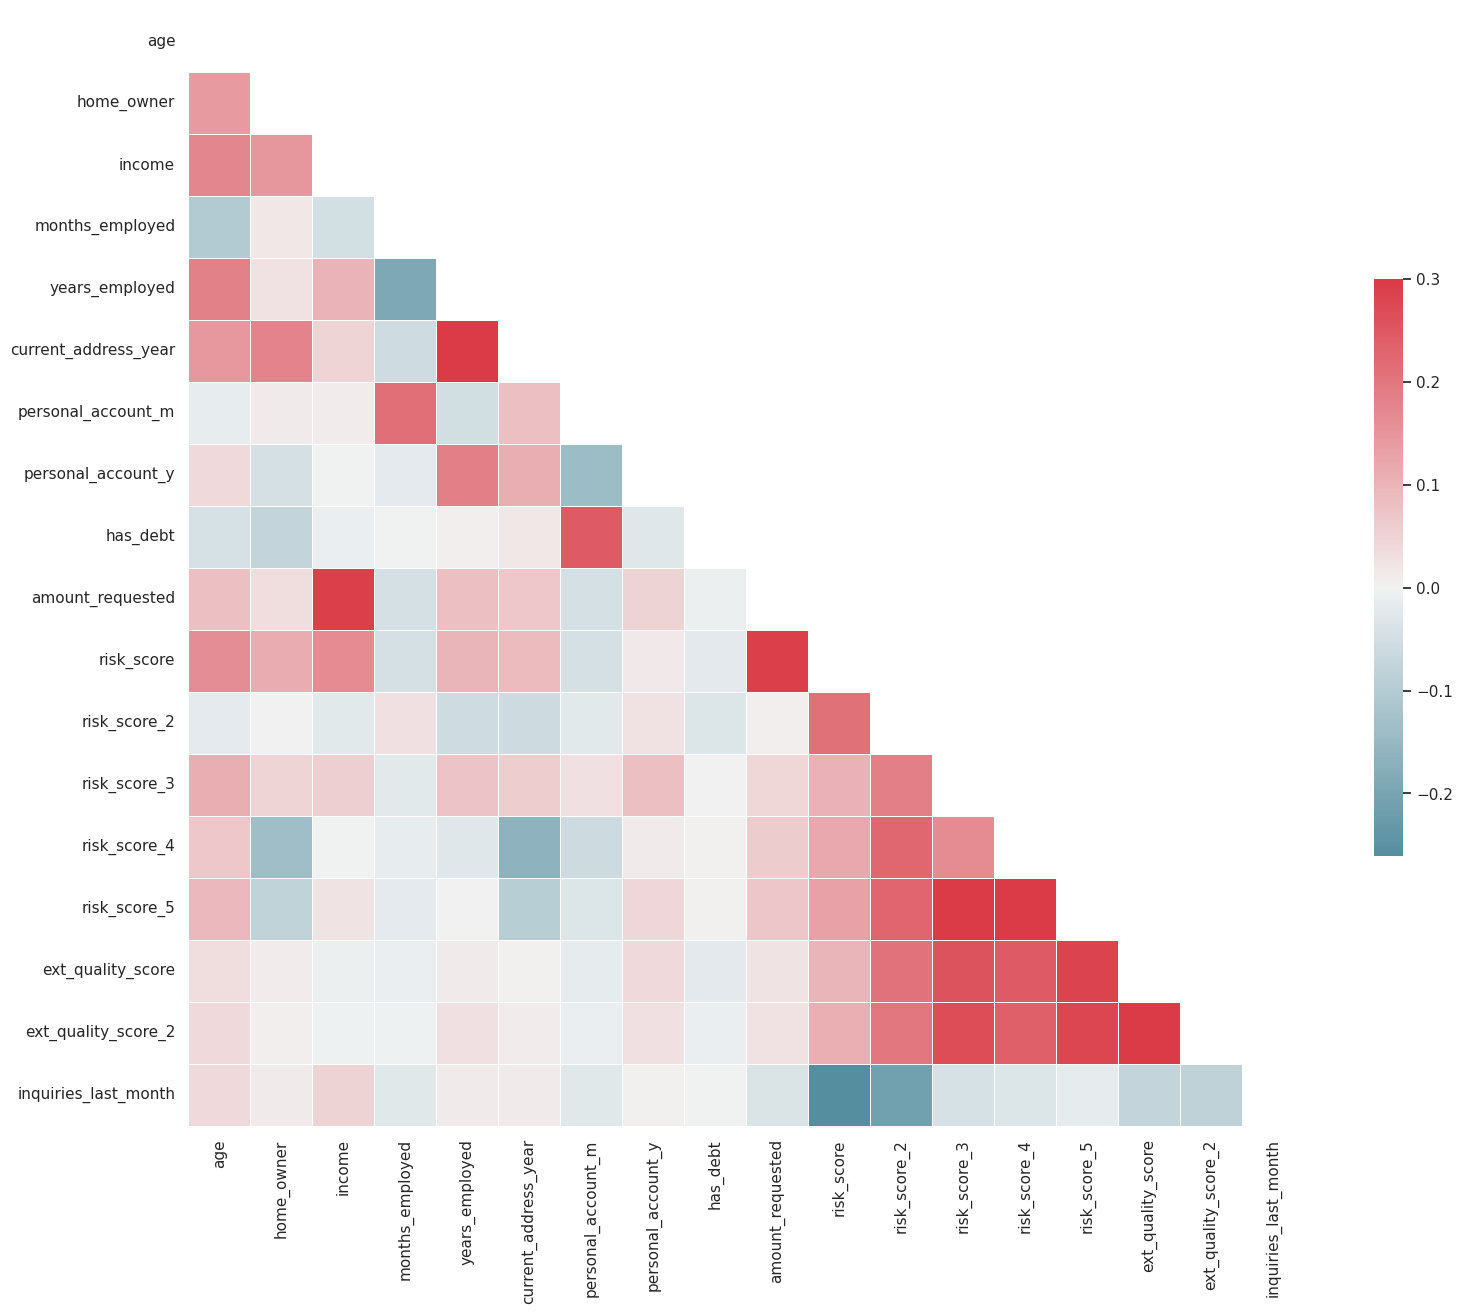

In [11]:
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# **Feature Engineering**

In [12]:
dataset = dataset.drop(columns = ['months_employed'])
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

# **One Hot Encoding**

In [13]:
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

# Removing extra columns

In [14]:
response = dataset["e_signed"]
users = dataset['entry_id']
dataset = dataset.drop(columns = ["e_signed", "entry_id"])

# **Splitting into Train and Test Set**







In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

# **Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# **Model Building**

#**1. Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

# **Predicting Test Set**

In [18]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results= pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [19]:
results_Logistic_Regression = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_Logistic_Regression

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351


# **Support Vector machine**

In [20]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# **Predicting Test Set**

In [21]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_SVM = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_SVM


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.568398,0.577832,0.735477,0.647193


In [22]:
results = pd.concat([results, results_SVM], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193


# Suport Vector Machine (RDF)

In [23]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(random_state=0)

# **Predicting Test Set**

In [24]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [25]:
results_SVM_RBF = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_SVM_RBF

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (RBF),0.591569,0.60573,0.690871,0.645505


In [26]:
results = pd.concat([results, results_SVM_RBF], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505


# **Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

# Predicting Test Set

In [28]:
y_pred = classifierRF.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

## **K-fold Cross Validation**

In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierRF, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


# **Applying Grid Search**

# **Round 1: Entropy**

In [30]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}


In [31]:
from sklearn.model_selection import RandomizedSearchCV
RandomizedSearchCV = RandomizedSearchCV(estimator = classifierRF, # Make sure classifier points to the RF model
                         param_distributions=parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [32]:
t0 = time.time()
RandomizedSearchCV = RandomizedSearchCV.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 557.73 seconds


In [33]:
rf_best_accuracy = RandomizedSearchCV.best_score_
rf_best_parameters = RandomizedSearchCV.best_params_
rf_best_accuracy, rf_best_parameters


(np.float64(0.6345122647725013),
 {'min_samples_split': 10,
  'min_samples_leaf': 5,
  'max_features': 5,
  'max_depth': None,
  'criterion': 'entropy',
  'bootstrap': True})

# **Round 2: Entropy**

In [34]:
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
RandomizedSearchCV = RandomizedSearchCV(estimator = classifierRF, # Make sure classifier points to the RF model
                         param_distributions=parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [36]:
t0 = time.time()
RandomizedSearchCV = RandomizedSearchCV.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 583.01 seconds


In [37]:
rf_best_accuracy = RandomizedSearchCV.best_score_
rf_best_parameters = RandomizedSearchCV.best_params_
rf_best_accuracy, rf_best_parameters


(np.float64(0.6329082149804879),
 {'min_samples_split': 10,
  'min_samples_leaf': 3,
  'max_features': 7,
  'max_depth': None,
  'criterion': 'entropy',
  'bootstrap': True})

In [38]:
y_pred = RandomizedSearchCV.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_Round1 = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [39]:
results = pd.concat([results, results_Round1], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,"Random Forest (n=100, GSx2 + Entropy)",0.627024,0.642445,0.692427,0.666500


# **Round 2: Gini**

In [47]:
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
RandomizedSearchCV = RandomizedSearchCV(estimator = classifierRF, # Make sure classifier points to the RF model
                           param_distributions = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [49]:
t0 = time.time()
RandomizedSearchCV = RandomizedSearchCV.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 835.10 seconds


In [50]:
rf_best_accuracy = RandomizedSearchCV.best_score_
rf_best_parameters = RandomizedSearchCV.best_params_
rf_best_accuracy, rf_best_parameters

(np.float64(0.635420816975755),
 {'min_samples_split': 4,
  'min_samples_leaf': 8,
  'max_features': 10,
  'max_depth': None,
  'criterion': 'gini',
  'bootstrap': True})

# **Predicting Test Set**

In [51]:
y_pred = RandomizedSearchCV.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_Round2 = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



In [55]:
results = pd.concat([results, results_Round2], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577832,0.735477,0.647193
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,"Random Forest (n=100, GSx2 + Entropy)",0.627024,0.642445,0.692427,0.666500
4,"Random Forest (n=100, GSx2 + Entropy)",0.627024,0.642445,0.692427,0.666500
5,"Random Forest (n=100, GSx2 + Gini)",0.630932,0.646236,0.694502,0.669500


Test Data Accuracy: 0.6309


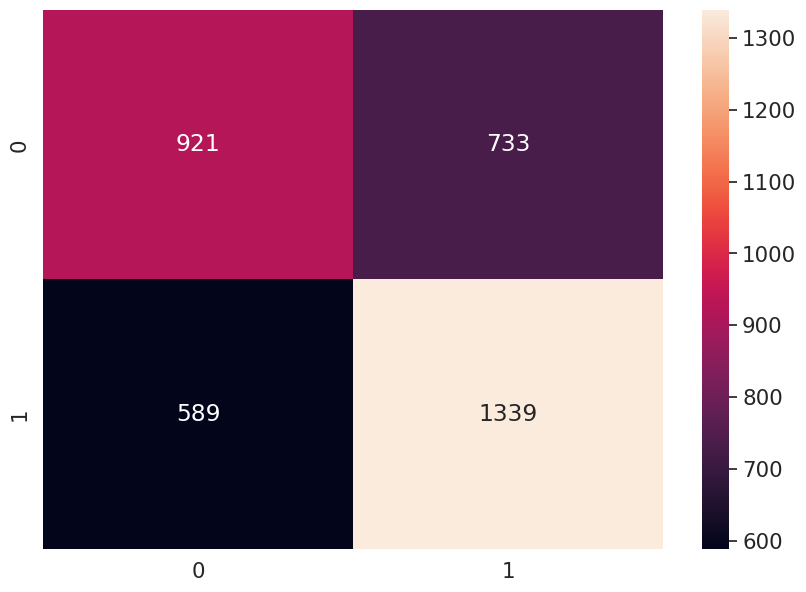

In [56]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [61]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]
final_results.head(100)

,entry_id,e_signed,predictions
3629,8825262,1.0,0
1820,9216889,1.0,0
6685,1762129,0.0,1
17241,7249770,1.0,1
8332,5967375,1.0,1
...,...,...,...
1797,6923000,0.0,0
6086,1877044,1.0,1
17296,7447360,1.0,1
9129,3578938,1.0,1
